### To predict if the person is male or female

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statistics
import math
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [2]:
mal_fem = pd.read_csv("voice.csv",index_col=False)

In [3]:
mal_fem.shape

(3168, 21)

# EDA

### Since label is a categorical variable, we change it to a dummy one, keeping male as base, i.e., male = 0 female =1

meanfreq: mean frequency (in kHz)
sd: standard deviation of frequency
median: median frequency (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: skewness (see note in specprop description)
kurt: kurtosis (see note in specprop description)
sp.ent: spectral entropy
sfm: spectral flatness 
mode: mode frequency
centroid: frequency centroid (see specprop)
peakf: peak frequency (frequency with highest energy)
meanfun: average of fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: average of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
label: male or female

In [4]:
mal_fem['class'] = np.where(mal_fem['label']=="male",0,1)
mal_fem1 = mal_fem.drop(['label'],axis=1)

In [5]:
#Checking null values:
mal_fem1.isnull().sum().sum()

0

##### Finding Distribution of male and female

male      1584
female    1584
Name: label, dtype: int64


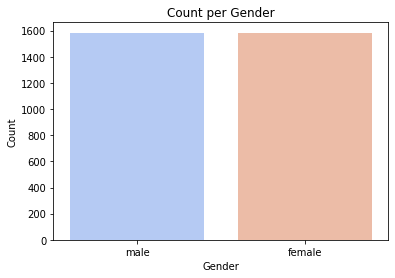

In [6]:
counts = sns.countplot(x='label', data=mal_fem, palette='coolwarm')
counts.set(xlabel='Gender', ylabel='Count', title='Count per Gender')
print(mal_fem['label'].value_counts())
#We can see that both male and female have the same count

In [7]:
mal_fem1.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,class
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499


In [8]:
mal =mal_fem1.iloc[:,1:20]
corr = mal.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
sd,1,-0.56,-0.85,-0.16,0.87,0.31,0.35,0.72,0.84,-0.53,-0.74,-0.47,-0.35,-0.13,-0.48,-0.36,-0.48,-0.48,0.12
median,-0.56,1,0.77,0.73,-0.48,-0.26,-0.24,-0.5,-0.66,0.68,0.93,0.41,0.34,0.25,0.46,0.19,0.44,0.44,-0.21
Q25,-0.85,0.77,1,0.48,-0.87,-0.32,-0.35,-0.65,-0.77,0.59,0.91,0.55,0.32,0.2,0.47,0.3,0.46,0.45,-0.14
Q75,-0.16,0.73,0.48,1,0.0096,-0.21,-0.15,-0.17,-0.38,0.49,0.74,0.16,0.26,0.29,0.36,-0.024,0.34,0.34,-0.22
IQR,0.87,-0.48,-0.87,0.0096,1,0.25,0.32,0.64,0.66,-0.4,-0.63,-0.53,-0.22,-0.07,-0.33,-0.36,-0.34,-0.33,0.041
skew,0.31,-0.26,-0.32,-0.21,0.25,1,0.98,-0.2,0.08,-0.43,-0.32,-0.17,-0.22,-0.081,-0.34,-0.062,-0.31,-0.3,-0.17
kurt,0.35,-0.24,-0.35,-0.15,0.32,0.98,1,-0.13,0.11,-0.41,-0.32,-0.19,-0.2,-0.046,-0.3,-0.1,-0.27,-0.27,-0.21
sp.ent,0.72,-0.5,-0.65,-0.17,0.64,-0.2,-0.13,1,0.87,-0.33,-0.6,-0.51,-0.31,-0.12,-0.29,-0.29,-0.32,-0.32,0.2
sfm,0.84,-0.66,-0.77,-0.38,0.66,0.08,0.11,0.87,1,-0.49,-0.78,-0.42,-0.36,-0.19,-0.43,-0.29,-0.44,-0.43,0.21
mode,-0.53,0.68,0.59,0.49,-0.4,-0.43,-0.41,-0.33,-0.49,1,0.69,0.32,0.39,0.17,0.49,0.2,0.48,0.47,-0.18


#### Observation: We can see that most of the variable are correlated with each other

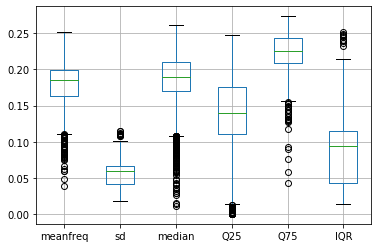

In [9]:
#Boxplot showing the range of variables
m = mal_fem1.iloc[:,0:6]
m.plot.box(grid='True')

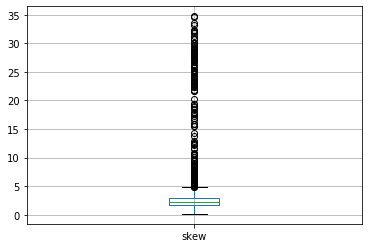

In [10]:
m = mal_fem1.iloc[:,6]
m.plot.box(grid='True')

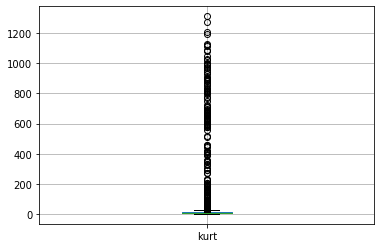

In [11]:
m = mal_fem1.iloc[:,7]
m.plot.box(grid='True')

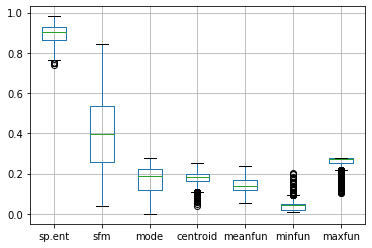

In [12]:
m = mal_fem1.iloc[:,8:15]
m.plot.box(grid='True')

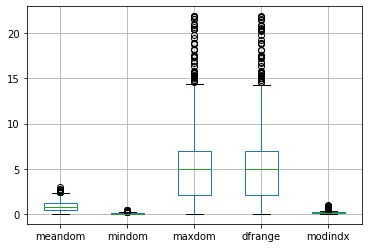

In [13]:
m = mal_fem1.iloc[:,15:20]
m.plot.box(grid='True')

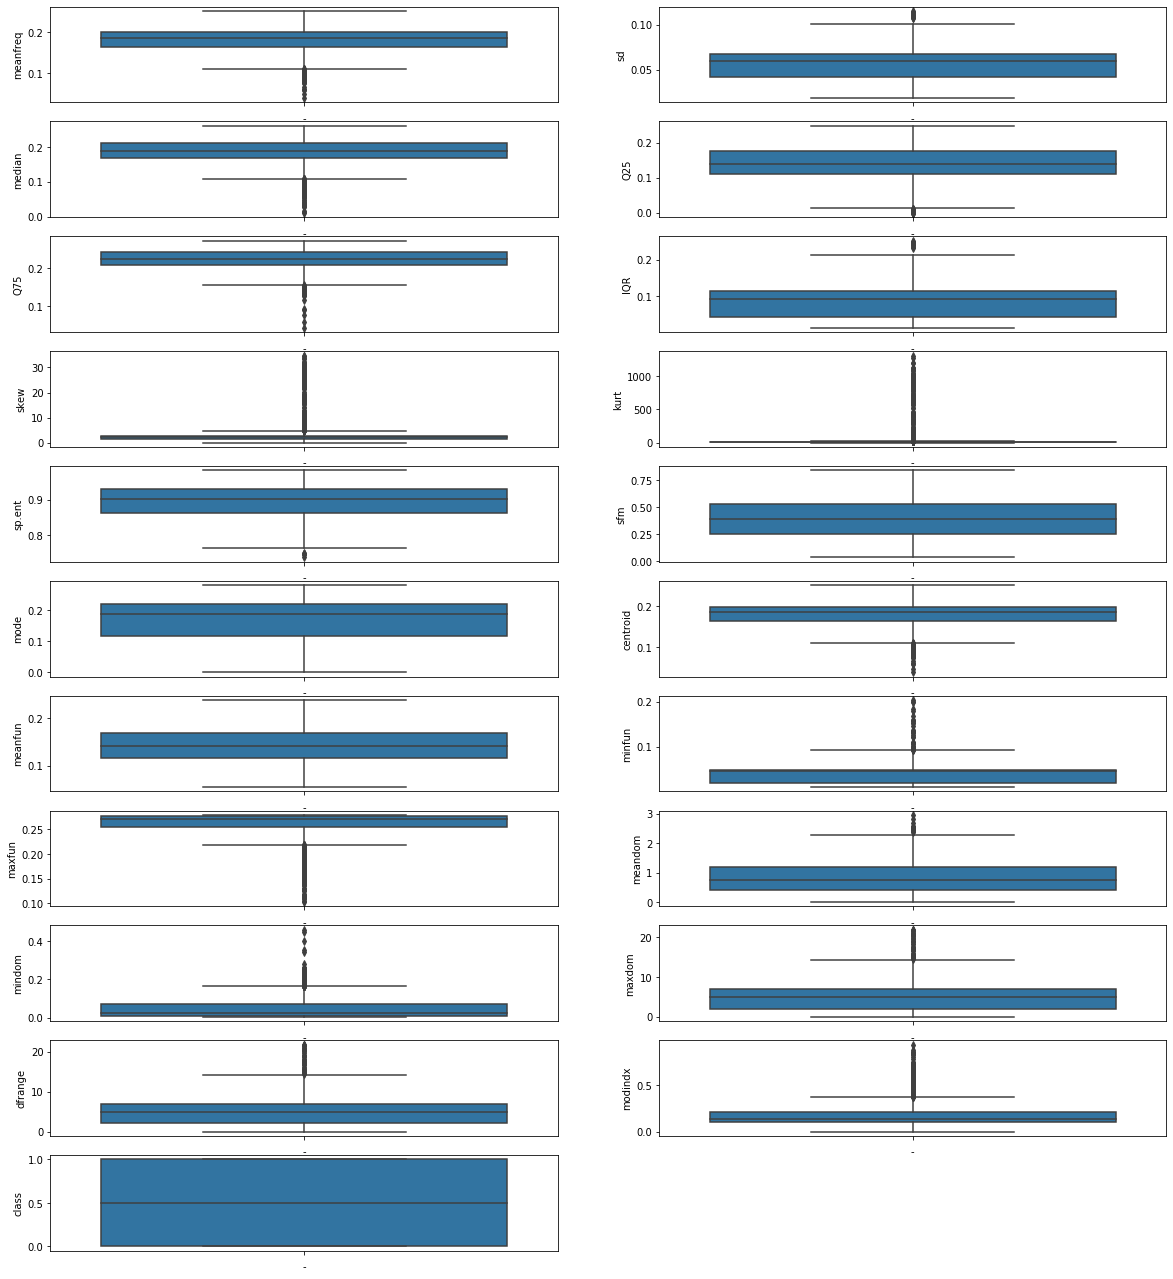

In [14]:
mal_fem1['-'] = ''

plt.figure(figsize=(20, 25))
for i , col in enumerate(list(mal_fem1.select_dtypes(include =np.number).columns)):
    ax = plt.subplot(12,2,i+1)
    sns.boxplot(x= mal_fem1["-"], y= mal_fem1[col])

mal_fem1.drop(columns = ['-'], inplace = True)

#### We can observe a lot of outliers, therefore we now do an outlier treatment

### Outlier Treatment

In [15]:
Q1 = mal_fem1.quantile(0.25)
Q3 = mal_fem1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

meanfreq    0.035484
sd          0.025067
median      0.041026
Q25         0.064852
Q75         0.034914
IQR         0.071615
skew        1.282125
kurt        7.979358
sp.ent      0.066902
sfm         0.275636
mode        0.103088
centroid    0.035484
meanfun     0.052582
minfun      0.029681
maxfun      0.023488
meandom     0.757338
mindom      0.062500
maxdom      4.937500
dfrange     4.947266
modindx     0.109417
class       1.000000
dtype: float64


In [16]:
mal_fem1_o = mal_fem1[~((mal_fem1 < (Q1 - 1.5 * IQR)) |(mal_fem1 > (Q3 + 1.5 * IQR))).any(axis=1)]
mal_fem1_o.shape

(2147, 21)

In [17]:
#Check null values :
mal_fem1.isnull().sum()
#There are no null values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
class       0
dtype: int64

In [18]:
print(mal_fem1_o['class'].value_counts())

0    1081
1    1066
Name: class, dtype: int64


### Since the dataset is very small, maybe its not capturing all the values therefore we can't say for sure if these are outliers.(link-doc)

### Train and test split

In [19]:
x= mal_fem1.iloc[:,:20]
y=mal_fem1.iloc[:,-1]
x["intercept"] = 1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Normalizing the data

In [21]:
#Normalizing the data
def norm(dataset):
    scaler = StandardScaler()
    newd =scaler.fit_transform(dataset)
    return newd

In [22]:
X_train=norm(X_train)
X_test=norm(X_test)

## Support Vector machine

### Running default SVM

In [218]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9810725552050473


C:\Users\ikapo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [219]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9869192602616148


## Creating a function for svm

In [220]:
svc=SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9768664563617245


### Kernel=Linear

In [221]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9765448804691024


### Kernel=Gaussian/rbf

In [222]:
svc=SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9810725552050473


C:\Users\ikapo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [223]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9869192602616148


### Kernel=Polynomial

In [224]:
svc=SVC(kernel = 'poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9600420609884333


C:\Users\ikapo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [225]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9643662607126748


### Repeating the same exercise for the runtime dataset used in project 1

In [23]:
run = pd.read_csv("sgemm_product.csv",index_col=False)
run["runavg (ms)"] = (run["Run1 (ms)"]+run["Run2 (ms)"]+run["Run3 (ms)"]+run["Run4 (ms)"])/4
run["log_run"] = np.where(run['runavg (ms)']>statistics.median(run["runavg (ms)"]), 1.0, 0.0)
run=run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
run

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0.0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0.0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0.0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0.0


In [24]:
x_1= run.iloc[:,:14]
y_1=run.iloc[:,-1]
x_1["intercept"]=1
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.3, random_state=1)
X_train=norm(X_train)
X_test=norm(X_test)

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

In [34]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9614888836329234


### Linear

In [35]:
svc=SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8304635761589404


In [36]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.8325035477767266


### RBF

In [37]:
svc=SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9591197571743929


In [38]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9614888836329234


### Polynomial

In [39]:
svc=SVC(kernel = 'poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9073537527593819


In [42]:
y_pred=svc.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 0.9105901135288552


## DECISION TREES

### DECISION TREE CLASSIFIER FOR VOICE DETECTION DATA

In [239]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train=norm(X_train)
X_test=norm(X_test)

In [240]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test) 
acc = metrics.accuracy_score(y_test, pred)
print('Accuracy Score:',acc)

Accuracy Score: 0.9589905362776026


In [241]:
y_pred= model.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 1.0


### DECISION TREE CLASSIFIER FOR RUN DATA

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.3, random_state=3)
X_train=norm(X_train)
X_test=norm(X_test)

In [243]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test) 
acc = metrics.accuracy_score(y_test, pred)
print('Accuracy Score:',acc)

Accuracy Score: 0.9906318984547461


In [244]:
y_pred= model.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 1.0


## DECISION TREES WITH PRUNING

### Voice Detection

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train=norm(X_train)
X_test=norm(X_test)

In [26]:
accuracy_out=[]
accuracy_in=[]
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    model.fit(X_train, y_train)
    pred_out = model.predict(X_test) 
    acc_out = metrics.accuracy_score(y_test, pred_out)
    pred_in = model.predict(X_train)
    acc_in = metrics.accuracy_score(y_train, pred_in)
    accuracy_in.append(acc_in)
    accuracy_out.append(acc_out)

(19,
 [0.9542586750788643,
  0.9542586750788643,
  0.9574132492113565,
  0.9605678233438486,
  0.9716088328075709,
  0.9574132492113565,
  0.9574132492113565,
  0.9621451104100947,
  0.9558359621451105,
  0.9605678233438486,
  0.9605678233438486,
  0.9605678233438486,
  0.9574132492113565,
  0.9621451104100947,
  0.9558359621451105,
  0.9605678233438486,
  0.9574132492113565,
  0.9558359621451105,
  0.9621451104100947])

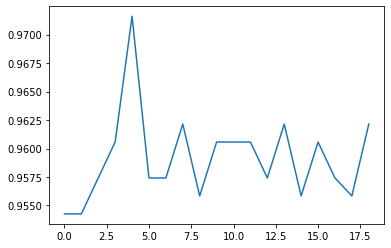

In [27]:
plt.plot(accuracy_out)
i,accuracy_out

(19,
 [0.9546172059984215,
  0.9546172059984215,
  0.9700078926598263,
  0.9771112865035517,
  0.9865824782951855,
  0.9932912391475928,
  0.9968429360694554,
  0.9992107340173638,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0])

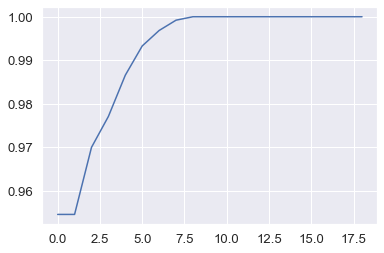

In [355]:
plt.plot(accuracy_in)
i,accuracy_in

### Run data

In [321]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.3, random_state=3)
X_train=norm(X_train)
X_test=norm(X_test)

In [313]:
accuracy_out=[]
accuracy_in=[]
for i in range(1,26):
    model = DecisionTreeClassifier(max_depth=i,criterion='gini')
    model.fit(X_train, y_train)
    pred_out = model.predict(X_test) 
    acc_out = metrics.accuracy_score(y_test, pred_out)
    pred_in = model.predict(X_train)
    acc_in = metrics.accuracy_score(y_train, pred_in)
    accuracy_in.append(acc_in)
    accuracy_out.append(acc_out)

(25,
 [0.6987168874172185,
  0.6987168874172185,
  0.7560154525386313,
  0.7882864238410596,
  0.81996412803532,
  0.8626379690949227,
  0.8934740618101545,
  0.9253311258278145,
  0.9390728476821192,
  0.9563741721854304,
  0.9668184326710817,
  0.9719784768211921,
  0.9789459161147903,
  0.9836920529801324,
  0.986189293598234,
  0.9883830022075055,
  0.9896109271523179,
  0.9901628035320088,
  0.9906594922737307,
  0.9907836644591611,
  0.9903973509933774,
  0.9904801324503312,
  0.9905215231788079,
  0.9905077262693157,
  0.9906594922737307])

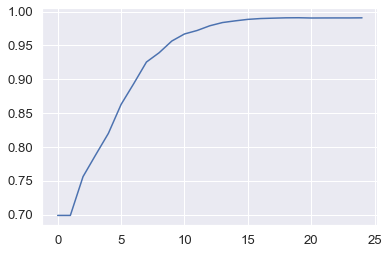

In [317]:
plt.plot(accuracy_out)
i,accuracy_out

[0.6983088930936613,
 0.6983088930936613,
 0.7554103595080416,
 0.7868377483443708,
 0.8192407757805109,
 0.863203642384106,
 0.8946546830652791,
 0.925715468306528,
 0.939811967833491,
 0.9579056291390728,
 0.9683538315988647,
 0.9743140964995269,
 0.98264545884579,
 0.9881681646168401,
 0.9922185430463576,
 0.9951277199621571,
 0.9974396877956481,
 0.9988765373699149,
 0.9996333964049195,
 0.9998403500473036,
 0.9999467833491013,
 1.0,
 1.0,
 1.0,
 1.0]

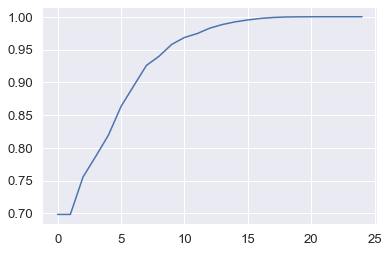

In [319]:
plt.plot(accuracy_in)
accuracy_in

In [318]:
y_pred= model.predict(X_train)
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred))

Accuracy Score: 1.0


## Boosting

### Voice Detection

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train=norm(X_train)
X_test=norm(X_test)

In [28]:
#Test accuracy score
model = AdaBoostClassifier(DecisionTreeClassifier())
model.fit(X_train,y_train)
pred = model.predict(X_test) 
acc = metrics.accuracy_score(y_test, pred)
print("The accuracy score is:" , acc)

The accuracy score is: 0.9700315457413249


In [29]:
#Train accuracy score
pred = model.predict(X_train) 
acc = metrics.accuracy_score(y_train, pred)
print("The accuracy score is:" , acc)

The accuracy score is: 1.0


### Pruning

[0.9763406940063092,
 0.9668769716088328,
 0.973186119873817,
 0.9794952681388013,
 0.9794952681388013,
 0.9747634069400631,
 0.9763406940063092,
 0.9779179810725552,
 0.9605678233438486,
 0.9605678233438486,
 0.9605678233438486,
 0.9574132492113565,
 0.9574132492113565,
 0.9621451104100947,
 0.9589905362776026,
 0.9589905362776026,
 0.9558359621451105,
 0.9621451104100947,
 0.9605678233438486,
 0.9589905362776026,
 0.9589905362776026,
 0.9574132492113565,
 0.9605678233438486,
 0.9605678233438486,
 0.9605678233438486]

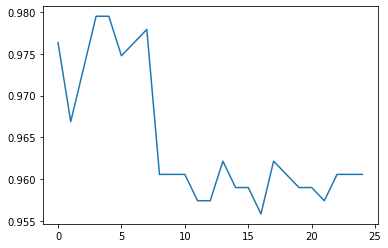

In [28]:
accuracy_out=[]
accuracy_in=[]
for i in range(1,26):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='entropy'))
    model.fit(X_train, y_train)
    pred_out = model.predict(X_test) 
    acc_out = metrics.accuracy_score(y_test, pred_out)
    pred_in = model.predict(X_train)
    acc_in = metrics.accuracy_score(y_train, pred_in)
    accuracy_in.append(acc_in)
    accuracy_out.append(acc_out)
plt.plot(accuracy_out)
accuracy_out

[0.9885556432517758,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

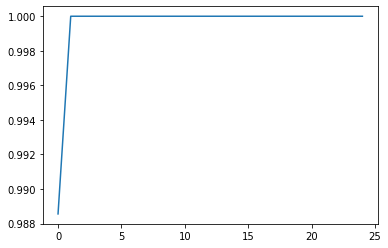

In [29]:
plt.plot(accuracy_in)
accuracy_in

## Run Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.3, random_state=3)
X_train=norm(X_train)
X_test=norm(X_test)

In [34]:
#Test accuracy score
model = AdaBoostClassifier(DecisionTreeClassifier())
model.fit(X_train,y_train)
pred = model.predict(X_test) 
acc = metrics.accuracy_score(y_test, pred)
print("The accuracy score is:", acc)

The accuracy score is: 0.9903283664459162


In [35]:
#Train accuracy score
pred = model.predict(X_train) 
acc = metrics.accuracy_score(y_train, pred)
print("The accuracy score is:", acc)

The accuracy score is: 1.0


## Pruning

[0.8003587196467992,
 0.9165149006622516,
 0.9541114790286975,
 0.9737996688741721,
 0.9823399558498896,
 0.9876517660044151,
 0.9899558498896247,
 0.9912113686534216,
 0.9903007726269316,
 0.9897488962472406,
 0.989362582781457,
 0.9906870860927153,
 0.9907008830022075,
 0.9906181015452539,
 0.990728476821192,
 0.9913493377483443,
 0.9915424944812362,
 0.9916666666666667,
 0.9915700883002208,
 0.9913769315673289,
 0.9920115894039735,
 0.9905491169977925,
 0.9903697571743929,
 0.9905629139072848,
 0.9904801324503312]

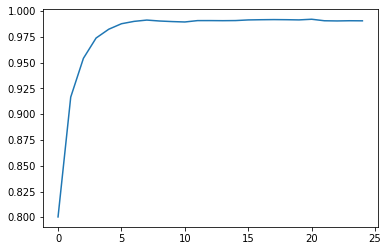

In [39]:
accuracy_out=[]
accuracy_in=[]
for i in range(1,26):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,criterion='gini'))
    model.fit(X_train, y_train)
    pred_out = model.predict(X_test) 
    acc_out = metrics.accuracy_score(y_test, pred_out)
    pred_in = model.predict(X_train)
    acc_in = metrics.accuracy_score(y_train, pred_in)
    accuracy_in.append(acc_in)
    accuracy_out.append(acc_out)
plt.plot(accuracy_out) #Test plot
accuracy_out

[0.8005026017029329,
 0.918968779564806,
 0.954629848628193,
 0.974526963103122,
 0.9850520340586566,
 0.9922835856196783,
 0.997918637653737,
 0.999988174077578,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

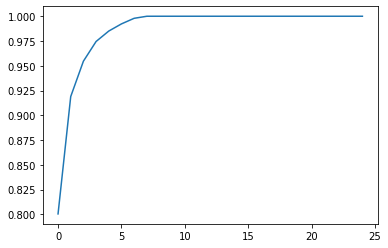

In [40]:
#Train plot
plt.plot(accuracy_in)
accuracy_in

## Cross Validation

## Kernel = RBF

### VOICE

In [25]:
x= mal_fem1.iloc[:,:20]
y=mal_fem1.iloc[:,-1]
x["intercept"] = 1

In [26]:
scores_in = []
scores_out=[]
svc = SVC(kernel='rbf')
cv = KFold(n_splits=10, random_state=50, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    svc = svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.9887758681164504, 0.9859698351455629, 0.9877236057523676, 0.9842160645387583, 0.9828130480533146, 0.9845668186601193, 0.9863205892669239, 0.9835145562960365, 0.9849228611500701, 0.985273492286115]
Out-sampling accuracies: [0.41009463722397477, 0.31230283911671924, 0.45110410094637227, 0.4889589905362776, 0.35331230283911674, 0.6214511041009464, 0.6214511041009464, 0.5299684542586751, 0.43354430379746833, 0.5981012658227848]
Average accuracy In-sampling: 0.9854096739265719
Average accuracy Out-sampling: 0.4820289102743282


### Run

In [29]:
x_1= run.iloc[:,:14]
y_1=run.iloc[:,-1]
x_1["intercept"]=1

In [ ]:
scores_in = []
scores_out=[]
svc = SVC(kernel='rbf')
cv = KFold(n_splits=3, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

## Kernel = Linear

## Voice

In [27]:
scores_in = []
scores_out=[]
svc = SVC(kernel='linear')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    X_train=norm(X_train)
    X_test=norm(X_test)
    svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2851, 21) (317, 21) (2851,) (317,)
(2852, 21) (316, 21) (2852,) (316,)
(2852, 21) (316, 21) (2852,) (316,)
In-sampling accuracies: [0.9824622939319537, 0.9750964573833742, 0.9803577692037881, 0.9743949491406524, 0.9747457032620134, 0.9779024903542617, 0.9779024903542617, 0.9743949491406524, 0.9758064516129032, 0.9768583450210379]
Out-sampling accuracies: [0.3501577287066246, 0.30914826498422715, 0.3722397476340694, 0.40063091482649843, 0.36908517350157727, 0.5993690851735016, 0.5962145110410094, 0.5709779179810726, 0.48417721518987344, 0.45569620253164556]
Average accuracy In-sampling: 0.9769921899404899
Average accuracy Out-sampling: 0.45076967615700997


## RUN

In [ ]:
scores_in = []
scores_out=[]
svc = SVC(kernel='linear')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

## Kernel = Polynomial

### VOICE

In [28]:
scores_in = []
scores_out=[]
svc = SVC(kernel='poly')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.976148719747457, 0.9743949491406524, 0.9754472115047352, 0.9729919326552087, 0.9743949491406524, 0.966678358470712, 0.9659768502279902, 0.9624693090143809, 0.9631837307152875, 0.9652875175315568]
Out-sampling accuracies: [0.5867507886435331, 0.5488958990536278, 0.6246056782334385, 0.6025236593059937, 0.5930599369085173, 0.3627760252365931, 0.3785488958990536, 0.21451104100946372, 0.3322784810126582, 0.37341772151898733]
Average accuracy In-sampling: 0.9696973528148634
Average accuracy Out-sampling: 0.4617368126821867


## RUN

In [ ]:
scores_in = []
scores_out=[]
svc = SVC(kernel='poly')
cv = KFold(n_splits=3, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    svc.fit(X_train, y_train)
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)
    scores_in.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_out.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

## Decision Trees

### VOICE

In [98]:
clf = DecisionTreeClassifier()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.9708874079270431, 0.9677306208347948, 0.9712381620484041, 0.9691336373202385, 0.9684321290775166, 0.9772009821115398, 0.9772009821115398, 0.9768502279901788, 0.9772089761570828, 0.985273492286115]
Out-sampling accuracies: [0.6466876971608833, 0.5299684542586751, 0.5583596214511041, 0.6182965299684543, 0.47634069400630913, 0.6529968454258676, 0.6466876971608833, 0.5141955835962145, 0.41455696202531644, 0.5981012658227848]
Average accuracy In-sampling: 0.9741156617864453
Average accuracy Out-sampling: 0.5656191350876493


### RUN

In [37]:
clf = DecisionTreeClassifier()
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    clf.fit(X_train, y_train)
    X_train=norm(X_train)
    X_test=norm(X_test)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.7372930463576159, 0.756705298013245, 0.7250413907284768, 0.8355960264900663, 0.6917218543046357, 0.8457781456953642, 0.7118377483443709, 0.6283112582781457, 0.9868791390728476, 0.9956953642384105]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.7914859271523178


### PRUNING , Taking depth = 4 for voice

In [99]:
clf = DecisionTreeClassifier(max_depth=4)
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.9708874079270431, 0.9677306208347948, 0.9712381620484041, 0.9691336373202385, 0.9684321290775166, 0.9772009821115398, 0.9772009821115398, 0.9768502279901788, 0.9772089761570828, 0.985273492286115]
Out-sampling accuracies: [0.6466876971608833, 0.5299684542586751, 0.5583596214511041, 0.6182965299684543, 0.47634069400630913, 0.6529968454258676, 0.6466876971608833, 0.5141955835962145, 0.41455696202531644, 0.5981012658227848]
Average accuracy In-sampling: 0.9741156617864453
Average accuracy Out-sampling: 0.5656191350876493


### PRUNING , Taking depth = 19 for run

In [38]:
clf = DecisionTreeClassifier(max_depth=19)
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [0.9995493009565857, 0.9994849153789551, 0.9993285504047094, 0.9992549668874172, 0.9993561442236939, 0.9992733627667403, 0.9993975349521708, 0.9993561442236939, 0.9994251287711553, 0.9993285504047094]
Out-sampling accuracies: [0.736796357615894, 0.7566225165562914, 0.7247930463576159, 0.835637417218543, 0.6914735099337749, 0.8457781456953642, 0.7118377483443709, 0.6259933774834437, 0.8428807947019867, 0.9956953642384105]
Average accuracy In-sampling: 0.9993754598969831
Average accuracy Out-sampling: 0.7767508278145695


## BOOSTING

### VOICE

In [41]:
clf = AdaBoostClassifier(DecisionTreeClassifier())
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.28391167192429023, 0.3501577287066246, 0.38801261829652994, 0.47634069400630913, 0.21766561514195584, 0.6813880126182965, 0.6309148264984227, 0.61198738170347, 0.44936708860759494, 0.5063291139240507]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.45960747514275446


### RUN

In [25]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [39]:
clf = AdaBoostClassifier(DecisionTreeClassifier())
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.4248344370860927, 0.7521109271523179, 0.5728476821192053, 0.6413907284768212, 0.6649834437086093, 0.6994205298013245, 0.6517384105960264, 0.5100165562913908, 0.6940811258278146, 0.3070364238410596]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.5918460264900662


### Pruning

### VOICE

In [40]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,criterion='gini'))
scores_in = []
scores_out=[]
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Out-sampling accuracies: [0.277602523659306, 0.334384858044164, 0.35646687697160884, 0.4384858044164038, 0.21451104100946372, 0.6908517350157729, 0.6277602523659306, 0.5993690851735016, 0.4240506329113924, 0.5031645569620253]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.4466647366529569


## RUN

In [42]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=19,criterion='entropy'))
scores_in = []
scores_out=[]
cv = KFold(n_splits=3, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x_1):
    X_train, X_test, y_train, y_test = x_1.iloc[train_index], x_1.iloc[test_index], y_1.iloc[train_index], y_1.iloc[test_index]
    X_train=norm(X_train)
    X_test=norm(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    scores_out.append(metrics.accuracy_score(y_pred_test, y_test))
    scores_in.append(metrics.accuracy_score(y_pred_train, y_train))
print("In-sampling accuracies:" ,scores_in)
print("Out-sampling accuracies:" ,scores_out)
print("Average accuracy In-sampling:", sum(scores_in)/len(scores_in))
print("Average accuracy Out-sampling:", sum(scores_out)/len(scores_out))

In-sampling accuracies: [1.0, 1.0, 1.0]
Out-sampling accuracies: [0.36332480691385005, 0.6847876025976929, 0.5779121602324513]
Average accuracy In-sampling: 1.0
Average accuracy Out-sampling: 0.5420081899146648


# -------------------------------------THE END---------------------------------------------